# CSE527 Homework1
**Due date: 13:59 on April 4, 2019 (Thursday)**

## Prerequisite
---
* **Install Python**: you are strongly recommended to install and use python version of **2.7.x** as some of the packages we use may not support the latest version of Python. you can download it at https://www.python.org/downloads/ or use Anaconda (a Python distribution) at https://docs.continuum.io/anaconda/install/. Below are some materials and tutorials which you may find useful for learning Python if you are new to Python.
  - https://docs.python.org/2.7/
  - https://www.learnpython.org/
  - http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html
  - http://www.scipy-lectures.org/advanced/image_processing/index.html


* **Install Python packages**: install Python packages: `numpy`, `matplotlib`, `opencv-python` using pip, for example:
```
pip install numpy matplotlib opencv-python
``` 
Sometimes you may need to use command `pip2` instead of `pip`


* **Install Jupyter Notebook**: follow the instructions at http://jupyter.org/install.html to install Jupyter Notebook and get yourself familiar with it. *After you have installed Python and Jupyter Notebook, please open the notebook file 'HW1.ipynb' with your Jupyter Notebook and do your homework there.*


## Example
---
Please read through the following examples where we apply image thresholding to an image. This example is desinged to help you get familiar with the basics of Python and routines of OpenCV. This part is for your exercises only, you do not need to submit anything from this part.

In [1]:
# import packages
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.filters
import math
import cv2 as cv
# from scipy import ndimage

from IPython.display import display, Image
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# function for image thresholding
def imThreshold(img, threshold, maxVal):
    assert len(img.shape) == 2 # input image has to be gray
    
    height, width = img.shape
    bi_img = np.zeros((height, width), dtype=np.uint8)
    for x in xrange(height):
        for y in xrange(width):
            if img.item(x, y) > threshold:
                bi_img.itemset((x, y), maxVal)
                
    return bi_img

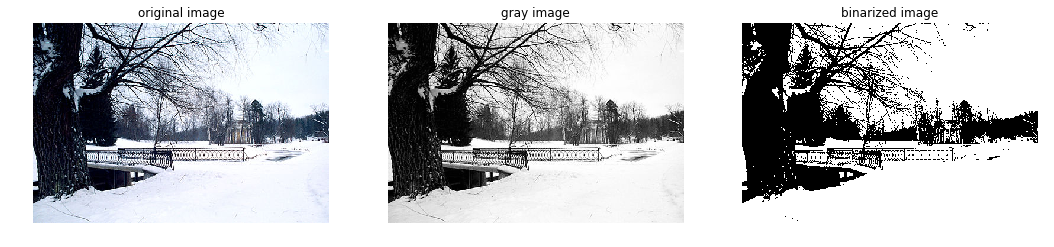

In [2]:
# read the image for local directory (same with this .ipynb) 
img = cv2.imread('SourceImages/snow.jpg')

# convert a color image to gray
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# image thresholding using global tresholder
img_bi = imThreshold(img_gray, 127, 255)

# Be sure to convert the color space of the image from
# BGR (Opencv) to RGB (Matplotlib) before you show a 
# color image read from OpenCV
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('original image')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_gray, 'gray')
plt.title('gray image')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_bi, 'gray')
plt.title('binarized image')
plt.axis("off")

plt.show()

## Description
---
In this homework, you will work on basic image processing problems with Python2. Make sure to install opencv for your Python2. There are four problems and one bouns problem in total with specific instructions for each of them. Be sure to read **Submission Guidelines** below. They are important.

## Problems
---

- **Problem 1 Gaussian convolution {25 pts}:** Write a function in Python that takes two arguments, a width parameter and a variance parameter, and returns a 2D array containing a Gaussian kernel of the desired dimension and variance. The peak of the Gaussian should be in the center of the array. Make sure to normalize the kernel such that the sum of all the elements in the array is 1. Use this function and the OpenCV’s `filter2D` routine to convolve the lena and lena_noise arrays with a 5 by 5 Gaussian kernel with sigma of 1. Repeat with a 11 by 11 Gaussian kernel with a sigma of 3. There will be four output images from this problem, namely, lena convolved with 3x3, 11x11, lena_noise convolved with 3x3, and 11x11. Once you fill in and run the codes, the outputs will be saved under Results folder. These images will be graded based on the difference with ground truth images. You might want to try the same thing on other images but it is not required. Include your code and results in your Jupyter Notebook file.

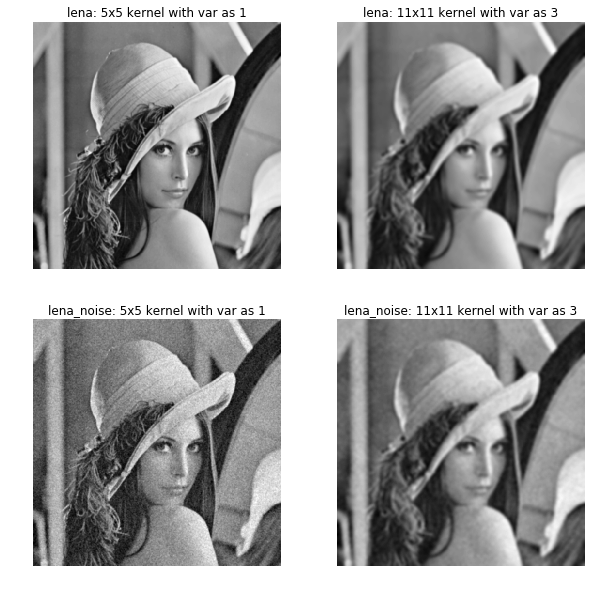

In [3]:
def genGaussianKernel(width, sigma):
    # create matrix with the given dimention and fill them with zeros
    peak = (int)(width/2)
    kernel_2d = [[0 for i in range(width)] for j in range(width)]
   #construct the kernel using the guassina formula
    sum_kernel = 0
    for x in range(width):
        for y in range(width):
            coeff = 1/float((2*(math.pi)*math.pow(sigma,2)))
            expo = math.exp(-(((math.pow((x-peak),2))+(math.pow((y-peak),2)))/(2*math.pow(sigma,2))))
            kernel_2d[x][y] = coeff * expo
            sum_kernel += kernel_2d[x][y]
    # normalize
    for i in range(width):
        for j in range(width):
            kernel_2d[i][j]= kernel_2d[i][j]/float(sum_kernel)
     
    kernel_2d = np.array(kernel_2d)    
        
    return kernel_2d

# Load images
lena       = cv2.imread('SourceImages/lena.bmp', 0)
lena_noise = cv2.imread('SourceImages/lena_noise.bmp', 0)

# Generate Gaussian kernels
kernel_1 = genGaussianKernel(5,1)     #  5 by 5 kernel with sigma of 1
kernel_2 = genGaussianKernel(11,3)    # 11 by 11 kernel with sigma of 3

# Convolve with lena and lena_noise
res_lena_kernel1 = cv2.filter2D(lena, -1, kernel_1)               
res_lena_noise_kernel1 =  cv2.filter2D(lena_noise, -1, kernel_1)  
res_lena_kernel2 = cv2.filter2D(lena, -1, kernel_2)               
res_lena_noise_kernel2 = cv2.filter2D(lena_noise, -1, kernel_2)  

# Write out result images
cv2.imwrite("Results/P1_01.jpg", res_lena_kernel1)
cv2.imwrite("Results/P1_02.jpg", res_lena_kernel2)
cv2.imwrite("Results/P1_03.jpg", res_lena_noise_kernel1)
cv2.imwrite("Results/P1_04.jpg", res_lena_noise_kernel2)

# Plot results
plt.figure(figsize = (10, 10))
plt.subplot(2, 2, 1)
plt.imshow(res_lena_kernel1, 'gray')
plt.title('lena: 5x5 kernel with var as 1')
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(res_lena_kernel2, 'gray')
plt.title('lena: 11x11 kernel with var as 3')
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(res_lena_noise_kernel1, 'gray')
plt.title('lena_noise: 5x5 kernel with var as 1')
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(res_lena_noise_kernel2, 'gray')
plt.title('lena_noise: 11x11 kernel with var as 3')
plt.axis("off")
plt.show()

- **Problem 2 Separable convolutions {25 pts}:** The Gaussian kernel is separable, which means that convolution with a 2D Gaussian can be accomplished by convolving the image with two 1D Gaussians, one in the x direction and the other one in the y direction. Perform a 11x11 convolution with sigma of 3 from question 1 using this scheme. You can still use `filter2D` to convolve the images with each of the 1D kernel. Verify that you get the similar results with what you did with 2D kernels by computing the difference image between the results from the two methods. This difference image should be close to blank. Include your code and results in your Jupyter Notebook file. There is no output image from this part. Be sure to display the result images in the jupyter file.

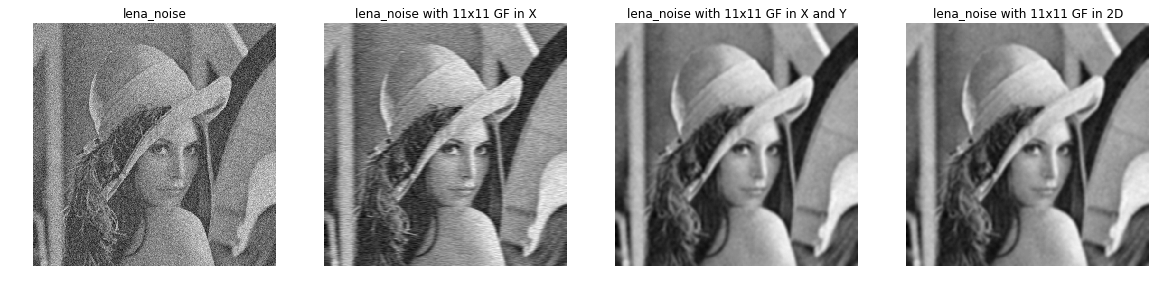

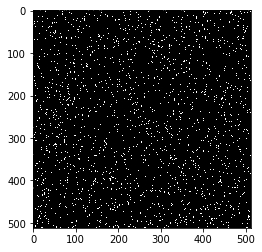

In [4]:
def genGausKernel1D(length, sigma):
    middle = length//2
    kernel_1d = [0]*length
    sum_1 = 0
    #construct kernel using the gaussian formula for 1D
    for j in range(length):
        coeff = 1 / float(math.sqrt(2*math.pi * math.pow(sigma,2))) 
        expo = -1 * (math.pow((j-middle), 2)/float(2 * math.pow(sigma,2)))        
        result = math.pow(math.e, expo)        
        kernel_1d[j] =  float(coeff * result)
        sum_1 += kernel_1d[j]
    #normalize
    for x in range(length):
        kernel_1d[x] = kernel_1d[x] / float((sum_1))
        
    kernel_1d = np.array(kernel_1d)   
    return kernel_1d

# Generate two 1d kernels here
width = 11
sigma = 3
kernel_x = genGausKernel1D(width, sigma)[np.newaxis]  # fill in your codes ...
kernel_y = genGausKernel1D(width, sigma).reshape((-1, 1))# fill in your codes ...
# Generate a 2d 11x11 kernel with sigma of 3 here as before
kernel_2d = genGaussianKernel(11,3)  # fill in your codes ...

# Convolve with lena_noise
res_lena_noise_kernel1d_x  = cv2.filter2D(lena_noise, -1, kernel_x)    # fill in your codes ...
res_lena_noise_kernel1d_xy = cv2.filter2D(res_lena_noise_kernel1d_x, -1, kernel_y)    # fill in your codes ...
res_lena_noise_kernel2d    = cv2.filter2D(lena_noise, -1, kernel_2d)   # fill in your codes ...

# Plot results
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.imshow(lena_noise, 'gray')
plt.title('lena_noise')
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(res_lena_noise_kernel1d_x, 'gray')
plt.title('lena_noise with 11x11 GF in X')
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(res_lena_noise_kernel1d_xy, 'gray')
plt.title('lena_noise with 11x11 GF in X and Y')
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(res_lena_noise_kernel2d, 'gray')
plt.title('lena_noise with 11x11 GF in 2D')
plt.axis("off")

plt.show()

# Compute the difference array
lena_diff = res_lena_noise_kernel2d - res_lena_noise_kernel1d_xy# fill in your codes ...
# 

plt.gray()
plt.imshow(lena_diff)

- **Problem 3 Laplacian of Gaussian {25 pts}:** Convolve an 23 by 23 Gaussian of sigma = 3 with the discrete approximation to the Laplacian kernel [1 1 1; 1 -8 1; 1 1 1]. Plot the Gaussian kernel and 2D Laplacian of Gaussian using the `Matplotlib` function `plot`. Use the `Matplotlib` function `plot_surface` to generate a 3D plot of LoG. Do you see why this is referred to as the Mexican hat filter? Include your code and results in your Jupyter Notebook file. There is no output image from this part.

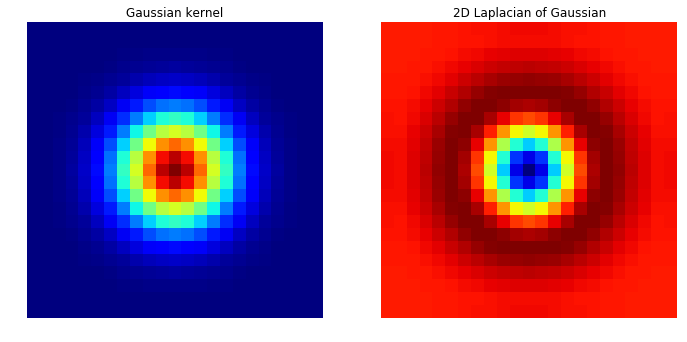

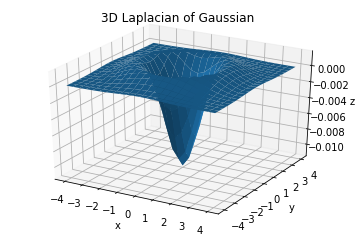

In [5]:
width = 23
sigma = 3

#Laplacian kernel
Laplacian_kernel = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])
#gaussina kernel
Gaussian_kernel = genGaussianKernel(width, sigma) 
# LoG
LoG = cv2.filter2D(Gaussian_kernel, -1, Laplacian_kernel) 


# Plot for Gaussian and Laplacian
fig = plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(Gaussian_kernel, interpolation='none', cmap=cm.jet)
plt.title('Gaussian kernel')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(LoG, interpolation='none', cmap=cm.jet)
plt.title('2D Laplacian of Gaussian')
plt.axis("off")

# 3d plot for LoG 

x = np.linspace(-4, 4, 23)
[X, Y] = np.meshgrid(x, x)
Z = LoG
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.plot_surface(X, Y, Z)

# labeling
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.title('3D Laplacian of Gaussian')
plt.show()

- **Problem 4 Histogram equalization {25 pts}:** Refer to Szeliski's book on section 3.4.1, and within that section to eqn 3.9 for more information on histogram equalization. Getting the histogram of a grayscale image is incredibly easy with python. A histogram is a vector of numbers. Once you have the histogram, you can get the cumulative distribution function (CDF) from it. Then all you have left is to find the mapping from each value [0,255] to its adjusted value (just using the CDF basically). **DO NOT** use cv2.equalizeHist() directly to solve the exercise! We will expect to see in your code that you get the PDF and CDF, and that you manipulate the pixels directly (avoid a for loop, though). There will be one output image from this part which is the histogram equalized image. It will be compared against the ground truth.

True

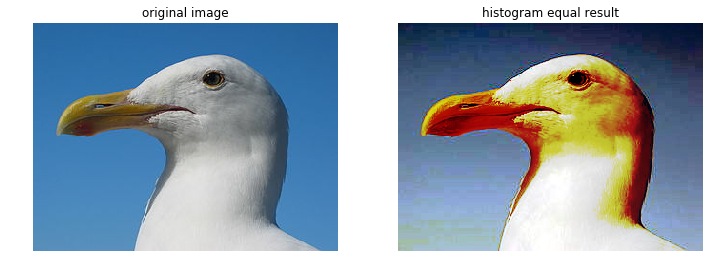

In [6]:
def histogram_equalization(image):
#get the size of the image
    d_x = np.size(image, 1)
    d_y = np.size(image,0)
    size = d_x * d_y 
    
#   extract each rgb color from the image
    b_c = image[:,:,0]
    g_c = image[:,:,1]
    r_c = image[:,:,2]
    
#   do equal_hist on each of the seperated colors  
    red =  hist_equal(r_c, size)
    green = hist_equal(g_c,size)
    blue =  hist_equal(b_c,size)
    
#   merge all the colors
    rgb_eq = np.dstack((blue,green,red)) 
    return True, rgb_eq

def hist_equal(img_in, size):
#   change the image 2D in to one array for calculating cdf and pdf  
    hist = np.bincount(img_in.flatten())     
    pdf = hist/float(size)
    cdf = np.cumsum(pdf)
    cdfR = cdf * 256 /cdf[-1]
    array = cdfR.astype('uint8')
    img_result = array[img_in]
    
    return img_result

# Read in input images
# img_equal = cv2.imread('SourceImages/hist_equal.jpg', cv2.IMREAD_COLOR)
img_equal = cv2.imread('SourceImages/hist_equal.jpg', cv2.IMREAD_COLOR)
# Histogram equalization
succeed, output_image = histogram_equalization(img_equal)

# Plot results
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_equal[..., ::-1])
plt.title('original image')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(output_image[..., ::-1])
plt.title('histogram equal result')
plt.axis("off")

# Write out results
cv2.imwrite("Results/P4_01.jpg", output_image)

- **Bonus problem: Low and high pass filters {20 pts}:**  follow these tutorials and you should be fine:
http://docs.opencv.org/master/de/dbc/tutorial_py_fourier_transform.html
http://docs.opencv.org/2.4/doc/tutorials/core/discrete_fourier_transform/discrete_fourier_transform.html <br>
For your LPF (low pass filter), mask a 20x20 window of the center of the FT (Fourier Transform) image (the low frequencies). For the HPF, just reverse the mask. The filtered low and high pass images will be the two outputs from this part and automatically saved to Results folder.

True

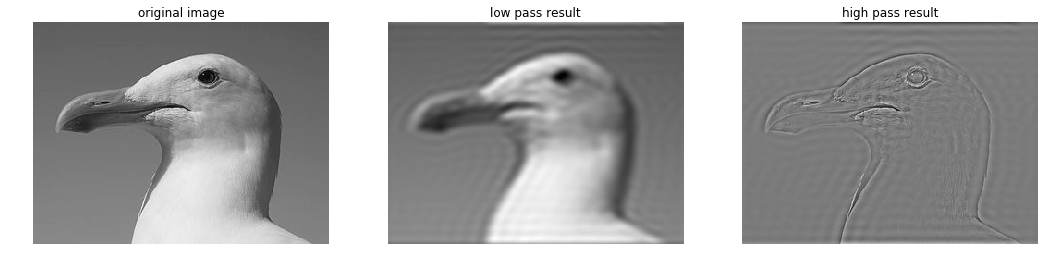

In [7]:
def low_pass_filter(img_in):
    
    #  create the frequency transform which is a complex array     
    dft = cv2.dft(np.float32(img_in),flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    
    length, width = img_in.shape
    row, col = length/2 , width/2
    
    # create a mask first, center square is 1, remaining all zeros
    mask = np.zeros((length,width,2),np.uint8)
    mask[ row - 20 : row + 20, col - 20 : col + 20] = 1
    
    # apply mask 
    filter_shift = dft_shift * mask
    filter_ishift = np.fft.ifftshift(filter_shift)
    
    # inverse DFT     
    img_inverted = cv.idft(filter_ishift)
    img_out = cv.magnitude(img_inverted[:,:,0],img_inverted[:,:,1])

    return True, img_out


def high_pass_filter(img_in):
    # filter
    f = np.fft.fft2(img_in)
    f_shift = np.fft.fftshift(f)
    
    # mask
    length, width = img_in.shape
    row,col = length//2 , width//2
    f_shift [row - 20 : row + 21, col - 20 : col + 21] = 0
    f_ishift = np.fft.ifftshift(f_shift)
   
    # apply mask and inverse DFT
    img_inverse = np.fft.ifft2(f_ishift)
    img_out = np.real(img_inverse)

    return True, img_out

# Read in input images
img_filter = cv2.imread('SourceImages/filter.png', 0)

# Low and high pass filter
succeed1, output_low_pass_image1  = low_pass_filter(img_filter)
succeed2, output_high_pass_image2 = high_pass_filter(img_filter)

# Plot results
fig = plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(img_filter, 'gray')
plt.title('original image')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(output_low_pass_image1, 'gray')
plt.title('low pass result')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(output_high_pass_image2, 'gray')
plt.title('high pass result')
plt.axis("off")

# Write out results
cv2.imwrite("Results/P5_01.jpg", output_low_pass_image1)
cv2.imwrite("Results/P5_02.jpg", output_high_pass_image2)

## Submission guidelines
---
Extract the downloaded .zip file to a folder of your preference. The input and output paths are predefined and **DO NOT** change them. The image read and write functions are already written for you. All you need to do is to fill in the blanks as indicated to generate proper outputs.

When submitting your .zip file through Google classroom, please <br> 
-- name your .zip file as Surname_Givenname_SBUID (example: Trump_Donald_11113456). <br>
-- DO NOT change the folder structre, please just fill in the blanks. <br>

You are encouraged to make posts and answer questions on Google classroom. Due to the amount of emails I receive from past years, it is unfortunate that I won't be able to reply all your emails. Please ask questions on Google Classroom and send emails only when it is private.

If you alter the folder strucutres, the grading of your homework will be significantly delayed and possibly penalized. And I **WILL NOT** reply to any email regarding this matter.

Be aware that your codes will undergo plagiarism checker both vertically and horizontally. Please do your own work.

Late submission penalty: <br>
There will be a 10% penalty per day for late submission. However, you will have 3 days throughout the whole semester to submit late without penalty. Note that the grace period is calculated by days instead of hours. If you submit the homework one minute after the deadline, one late day will be counted. Likewise, if you submit one minute after the deadline, the 10% penaly will be imposed if not using the grace period.